#### Clean and prepare data for modeling

In [7]:
# importing the neccessary packages
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# the first column can be used as index of the dataframe
fifa18 = pd.read_csv("../../../Data & Script/fifa-18-demo-player-dataset/fifa18.csv", index_col=0)
def fix(x):
    # evaluate sum
    if('+' in str(x).strip()):
        calc = x.split('+')
        return int(calc[0]) + int(calc[1])
    # evaluate subtraction
    elif('-' in str(x).strip()):
        calc = x.split('-')
        return int(calc[0]) + int(calc[1])
    # convert to integer if string contains a valid number
    elif str(x).strip().isdigit():
        return int(x)
    # return as it is, for example null values
    else:
         return x
for column in fifa18.iloc[:,11:74]:
    fifa18[column] = fifa18[column].apply(fix)
def convert(v):
        if('M' in str(v)):
            return float(v[1:-1]) * 1e6
        elif('K' in str(v)):
            return float(v[1:-1]) * 1e3  
        elif('€0' in str(v)):
            return float(v[1:])
        else:
            return v

fifa18['Value'] = fifa18['Value'].apply(convert)
fifa18['Wage'] = fifa18['Wage'].apply(convert)
fifa18.to_csv("fifamod3.csv")
fifa18.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
fifa18.columns

Index(['Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential',
       'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Acceleration',
       'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
       'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
       'GK diving', 'GK handling', 'GK kicking', 'GK positioning',
       'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping',
       'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning',
       'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
       'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision',
       'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID', 'LAM', 'LB', 'LCB',
       'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'Preferred Positions',
       'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [9]:
plt.rcParams['figure.figsize'] = [12.0, 12.0]
performance = fifa18.iloc[:,12:45]

A correlation closer to one is a strong correlation, I assumed if the absolute value of a corrleation between two variables is less than 0.6, there is no strong correlation between the variables.

In [10]:
less_correlated = (abs(performance.corr()) < 0.6).sum()
less_correlated = less_correlated.sort_values(ascending=False)
print("Displaying 15 player performance attributes, least correlated(with others)")
less_correlated.head(10)

Displaying 15 player performance attributes, least correlated(with others)


Jumping            32
Reactions          32
Strength           32
Standing tackle    28
Sliding tackle     28
Interceptions      28
Marking            28
Balance            27
Aggression         26
Acceleration       24
dtype: int64

In [11]:
print("Displaying 15 player performance attributes, most correlated(with others)")
less_correlated.tail(10)

Displaying 15 player performance attributes, most correlated(with others)


Stamina          15
Penalties        15
Curve            13
Long shots       13
Shot power       12
Short passing    11
Positioning      10
Crossing          9
Ball control      9
Dribbling         9
dtype: int64

In [12]:
print(pd.concat([fifa18[less_correlated.index], fifa18["Wage"]], axis=1).corr()['Wage'])
print("Wage vs Overall", np.corrcoef(fifa18['Wage'], fifa18['Overall']))

Jumping               0.153346
Reactions             0.501808
Strength              0.165271
Standing tackle       0.131322
Sliding tackle        0.116410
Interceptions         0.163397
Marking               0.110752
Balance               0.085899
Aggression            0.206696
Acceleration          0.146702
Sprint speed          0.154200
Agility               0.174322
Heading accuracy      0.205488
Long passing          0.290207
Finishing             0.233652
Vision                0.317854
Free kick accuracy    0.247218
Composure             0.391712
GK reflexes          -0.036310
GK positioning       -0.035451
GK kicking           -0.038574
GK handling          -0.034461
GK diving            -0.035687
Stamina               0.203128
Penalties             0.237397
Curve                 0.268176
Long shots            0.264503
Shot power            0.272014
Short passing         0.307819
Positioning           0.242818
Crossing              0.242962
Ball control          0.293757
Dribblin

* Predicting Wage of players is not possible using the performance attributes, because none of them are correlated with Wage. 
* Wage is somewhat correlated with Overall

In [13]:
fifa18[['Crossing', 'Ball control', 'Dribbling']].corr()

,Crossing,Ball control,Dribbling
Crossing,1.000000,0.839428,0.852374
Ball control,0.839428,1.000000,0.932543
Dribbling,0.852374,0.932543,1.000000


Crossing, Ball control and Dribbling are most correlated with the other performance attributes and correlated with each other

In [47]:
# Driblling is correlated with most of the performance attributes 
dribbling_correlated = fifa18[less_correlated.index].corr()['Dribbling'].sort_values(ascending=False).head(20)

In [15]:
print("Features with low multicolinearity")
less_correlated.head(15).index

Features with low multicolinearity


Index(['Jumping', 'Reactions', 'Strength', 'Standing tackle', 'Sliding tackle',
       'Interceptions', 'Marking', 'Balance', 'Aggression', 'Acceleration',
       'Sprint speed', 'Agility', 'Heading accuracy', 'Long passing',
       'Finishing'],
      dtype='object')

In [46]:
print("Features with strong correlation to dribbling")
dribbling_correlated.head(11).index

Features with strong correlation to dribbling


Index(['Dribbling', 'Ball control', 'Positioning', 'Crossing', 'Curve',
       'Long shots', 'Short passing', 'Finishing', 'Shot power', 'Penalties',
       'Agility'],
      dtype='object')

In [17]:
intersection = [value for value in dribbling_correlated.index if value in less_correlated.head(15).index] 
# accelaration is highly correlated with Sprint Speed, so one of them can exist
intersection.remove('Acceleration')
fifa18[intersection].corr()

,Finishing,Agility,Sprint speed,Long passing,Balance,Heading accuracy
Finishing,1.000000,0.634089,0.586749,0.504226,0.512669,0.472281
Agility,0.634089,1.000000,0.753129,0.514692,0.765750,0.259485
Sprint speed,0.586749,0.753129,1.000000,0.424732,0.635713,0.385599
Long passing,0.504226,0.514692,0.424732,1.000000,0.457044,0.511599
Balance,0.512669,0.765750,0.635713,0.457044,1.000000,0.171030
Heading accuracy,0.472281,0.259485,0.385599,0.511599,0.171030,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


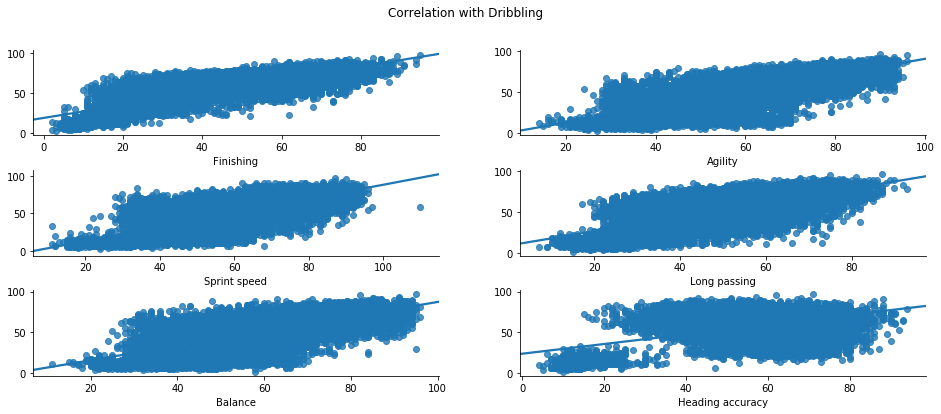

In [18]:
# Scatter plot

# scatter plot to show the relationship between depedent and independent variables
fig = plt.figure(figsize=(16,6))
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)
fig.suptitle("Correlation with Dribbling")
for i,v in enumerate(intersection): 
    ax = fig.add_subplot(320 + i +1)
    sns.regplot(fifa18[v], fifa18['Dribbling'])
    sns.despine()
    ax.set(ylabel='')

* The above features are good to predict Dribbling, because there are less correlated with other performance attributes and with each other. 
* They are correlated with the outcome variable

##### Predict Dribbling Skill

In [19]:
# OLS

from sklearn.linear_model import LinearRegression
X = fifa18[intersection]
Y =  fifa18[['Dribbling']]
modelA = LinearRegression()
print("OLS: R2 on training set", modelA.fit(X,Y).score(X,Y))
# cross validation, r2
from sklearn.model_selection import cross_val_score
X = fifa18[intersection]
Y =  fifa18[['Dribbling']]
cscore = cross_val_score(modelA, X, Y, cv=10, scoring='r2')
print("OLS: CV-score(r2): {:.2f}, {:.2f} (+/- {:.2f})".format(cscore.max(), cscore.mean(), cscore.std() * 2))

OLS: R2 on training set 0.8680514495123816
OLS: CV-score(r2): 0.89, 0.85 (+/- 0.04)


In [20]:
# KNN

from sklearn import neighbors
from sklearn.model_selection import cross_val_score
X = fifa18[intersection]
Y =  fifa18[['Dribbling']]
# Build our model.
modelB = neighbors.KNeighborsRegressor(n_neighbors=10)
modelC = neighbors.KNeighborsRegressor(n_neighbors=10, weights="distance")

modelB.fit(X, Y)
modelC.fit(X,Y)
cscore = cross_val_score(modelB, X, Y, cv=10)
print("KNN: Unweighted Accuracy: {:.2f}, {:.2f} (+/- {:.2f})".format(cscore.max(), cscore.mean(), cscore.std() * 2))
score_w = cross_val_score(modelC, X, Y, cv=10)
print("KNN: Weighted Accuracy: {:.2f}, {:.2f} (+/- {:.2f})".format(score_w.max(), score_w.mean(), score_w.std() * 2))

KNN: Unweighted Accuracy: 0.88, 0.85 (+/- 0.04)
KNN: Weighted Accuracy: 0.89, 0.86 (+/- 0.04)


Both KNN and OLS performed well

KNN don't assume an explicit form for f (X), providing a more flexible approach. Let me try to predict an outcome which is not correlated with the input features

##### Predicting Wage from Uncorrelated features

In [21]:
# OLS

from sklearn.linear_model import LinearRegression
X = fifa18[intersection]
Y = fifa18['Wage']
modelTT = LinearRegression()
modelTT.fit(X,Y).score(X,Y)
cscore = cross_val_score(modelTT, X, Y, cv=10)
print("OLS: Unweighted Accuracy: {:.2f}, {:.2f} (+/- {:.2f})".format(cscore.max(), cscore.mean(), cscore.std() * 2))

OLS: Unweighted Accuracy: -0.26, -16.14 (+/- 39.34)


In [22]:
# KNN

X = fifa18[intersection]
Y = fifa18['Wage']
modelE = neighbors.KNeighborsRegressor(n_neighbors=10)
modelF = neighbors.KNeighborsRegressor(n_neighbors=10,weights="distance")
modelE.fit(X, Y)
modelF.fit(X,Y)
cscore = cross_val_score(modelE, X, Y, cv=10)
print("KNN: Unweighted Accuracy: {:.2f}, {:.2f} (+/- {:.2f})".format(cscore.max(), cscore.mean(), cscore.std() * 2))
score_w = cross_val_score(modelF,X, Y, cv=10)
print("KNN: Weighted Accuracy: {:.2f}, {:.2f} (+/- {:.2f})".format(score_w.max(), score_w.mean(), score_w.std() * 2))

KNN: Unweighted Accuracy: -0.47, -3.27 (+/- 6.39)
KNN: Weighted Accuracy: -0.47, -3.24 (+/- 6.27)


Both KNN and OLS didn't succeed. OLS model is slighly better than baseline

Predicting Wage of players using the 6 features didn't suceed. Next I will try to predict wage based on all performance attributes

##### Predicting Wage from 34 performance attributes

In [23]:
# OLS
from sklearn.linear_model import LinearRegression
X = performance
Y = fifa18['Wage']
modelG = LinearRegression()
print("OLS: R2 on training set", modelG.fit(X,Y).score(X,Y))
cscore = cross_val_score(modelG, X, Y, cv=10, scoring='r2')
print("OLS: CV-score(r2): {:.2f}, {:.2f} (+/- {:.2f})".format(cscore.max(), cscore.mean(), cscore.std() * 2))

OLS: R2 on training set 0.3049247085472273
OLS: CV-score(r2): -0.15, -51.21 (+/- 264.44)


In [24]:
# KNN
X = performance
Y = fifa18['Wage']
modelH = neighbors.KNeighborsRegressor(n_neighbors=10)
modelH.fit(X, Y)
modelI = neighbors.KNeighborsRegressor(n_neighbors=10,weights="distance")
modelI.fit(X,Y)
cscore = cross_val_score(modelH, X, Y, cv=10)
print("Unweighted Accuracy: {:.2f}, {:.2f} (+/- {:.2f})".format(cscore.max(), cscore.mean(), cscore.std() * 2))
score_w = cross_val_score(modelI,X, Y, cv=10)
print("Weighted Accuracy: {:.2f}, {:.2f} (+/- {:.2f})".format(score_w.max(), score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18, -0.49 (+/- 0.65)
Weighted Accuracy: -0.20, -0.50 (+/- 0.64)


R-squared can be artificially made high. That is we can increase the value of R-squared by simply adding more and more independent variables to our model. In other words R-squared never decreases upon adding more independent variables.

 **Hence R-squared will increase even when the variable is not significant to our model**

How do we measure the significance of a variable to our model?

Here is the formula for adjusted r-squared

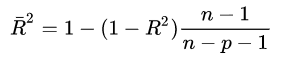

There are 18000 rows in this dataset. n - p doesn't change by much if I increase the number of features to two digits.

https://towardsdatascience.com/coefficient-of-determination-r-squared-explained-db32700d924e

##### Testing with one independent variable

In [25]:
X = fifa18[['Heading accuracy']]
Y = fifa18['Dribbling']
modelZ = neighbors.KNeighborsRegressor(n_neighbors=20, weights='distance')
cscore = cross_val_score(modelZ, X, Y, cv=10)
print("CV-score_KNN: {:.2f}, {:.2f} (+/- {:.2f})".format(cscore.max(), cscore.mean(), cscore.std() * 2))
modelZZ = LinearRegression()
cscore = cross_val_score(modelZZ, X, Y, cv=10, scoring='r2')
print("CV-score_OLS: {:.2f}, {:.2f} (+/- {:.2f})".format(cscore.max(), cscore.mean(), cscore.std() * 2))

CV-score_KNN: 0.63, 0.44 (+/- 0.41)
CV-score_OLS: 0.27, 0.19 (+/- 0.10)


In [26]:
X = fifa18[['Sprint speed']]
Y = fifa18['Dribbling']
modelZ = neighbors.KNeighborsRegressor(n_neighbors=20, weights='distance')
cscore = cross_val_score(modelZ, X, Y, cv=10)
print("CV-score_KNN: {:.2f}, {:.2f} (+/- {:.2f})".format(cscore.max(), cscore.mean(), cscore.std() * 2))
modelZZ = LinearRegression()
cscore = cross_val_score(modelZZ, X, Y, cv=10, scoring='r2')
print("CV-score_OLS: {:.2f}, {:.2f} (+/- {:.2f})".format(cscore.max(), cscore.mean(), cscore.std() * 2))

CV-score_KNN: 0.52, 0.45 (+/- 0.11)
CV-score_OLS: 0.51, 0.45 (+/- 0.09)


I can say that the relationship between Heading accuracy and Dribbling is somewhat clustered into two. 
So KNN performed better than OLS

#### using filter methods to choose best features to predict Dribbling

Scikit learn provides the Selecting K best features using F-Test.

sklearn.feature_selection.f_regression
sklearn.feature_selection.SelectKBest

In [75]:
from sklearn.feature_selection import SelectKBest, f_regression
X = performance
Y = fifa18.Dribbling
selector = SelectKBest(k=10)

selector.fit(X, Y)

X_new = selector.transform(X)
print(X_new.shape)

X.columns[selector.get_support(indices=True)]

#2nd way
X.columns[selector.get_support(indices=True)].tolist()

(17981, 10)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


['Ball control',
 'Crossing',
 'Dribbling',
 'GK diving',
 'GK handling',
 'GK kicking',
 'GK positioning',
 'GK reflexes',
 'Positioning',
 'Short passing']

In [70]:
performance.corr()['Dribbling'].sort_values(ascending=False).head(10)

Dribbling        1.000000
Ball control     0.932543
Positioning      0.893437
Crossing         0.852374
Curve            0.841406
Long shots       0.838238
Short passing    0.836368
Finishing        0.820918
Shot power       0.796967
Penalties        0.768814
Name: Dribbling, dtype: float64

https://stats.stackexchange.com/questions/204141/difference-between-selecting-features-based-on-f-regression-and-based-on-r2

#### What about using the coffiencents of a Linear Regression model

In [73]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
X = performance.drop("Dribbling", axis=1)
Y = fifa18.Dribbling
X = sm.add_constant(X)
test_model = smf.OLS(Y,X.astype(float)).fit()

print(test_model.params.sort_values(ascending=False).head(11))

const             1.972176
Ball control      0.503886
Positioning       0.140993
Crossing          0.126746
Acceleration      0.087036
Finishing         0.069272
Vision            0.059469
Sprint speed      0.057871
Long shots        0.050668
Curve             0.048108
Sliding tackle    0.043765
dtype: float64


#### Technical Coaching

Tinsae [5:56 PM]
• Challenge: Find a data set and build a KNN Regression and an OLS regression and make a conclusion about their behaviors
    
• I tried to predict soccer players Dribbling skill using six player performance features(like Sprint Speed, Finishing...)

• I made sure that the selected features are correlated with Dribbling(> 0.6) and less correlated with each other (< 0.5)

•  Cross-Validation result(R2): KNN(10 neighbors) = 0.86    OLS =0.86)
    
•  Then I tried to predict Wages using 34 independent player performance attributes

• Cross-Validation result(R2): KNN(10 neighbors) = - 51.21    OLS =0.3
    
• I also tried to predict Wage using 6 performance features(uncorrelated with Wage)

• Cross-Validation result(R2): KNN(10 neighbors) = -3.14    OLS = 0.106

What can I conclude from these results? Can I say OLS is mostly better than the baseline(R2 is greater than 0 for all three cases)?



mswirsky APP [1 hour ago]
**It's hard to make conclusions only knowing one number metric for each model.  I assume that's the mean test accuracy for all folds of the cross val in each case?**
**What was the standard deviation of the values for each? And what was the difference between train score and test score?**
**I would also refrain from making too many statements about applicability using those terrible model inputs in the second and third cases. You're intentionally making bad models there. The first case is the real test of model vs model.**
**In general, KNN has a greater ability to model complex behavior than OLS, but also has a greater ability to overfit to training data, which is how you can get those truly terrible accuracy metrics in the second and third cases.**

tigial3535 APP [1 hour ago]

(3rd case)
// interesection is a list containing 6 features
X = fifa18[intersection]
Y =  fifa18['Wage']
// max, mean, stdev * 2
KNN Unweighted Accuracy: -0.47, -3.27 (+/- 6.39)
KNN Weighted Accuracy: -0.47, -3.24 (+/- 6.27)
Here is the whole notebok
https://github.com/Tinsae/Thinkful-Data-Science/blob/master/DS/Unit%203/3.1.4%2BModel%20Comparison%2BOLS%20vs%20KNN%20Regression.ipynb

I agree that I made a bad model while trying to compare the two. Can you suggest me how to practically show the power of KNN for this dataset or any other dataset?


Mike Swirsky (Agent) APP [44 minutes ago]
**Okay, so for the first thing: I think the idea that a correlation coefficient less than 0.5 is "uncorrelated" isn't really true. If you have a lot of features, each one may not be great at correlating the outcome, but many weakly correlated features may be good predictors of the outcome, used together. That's really one of the strengths of machine learning over just doing analysis.**
**Another initial thing to think about: the correlation coefficient is based on a linear correlation of the feature with the outcome. If there is a significantly nonlinear relationship, but there is still a trend, your correlation coefficient will not be a great predictor of how good the feature is at predicting the outcome. There are other methods for evaluating how good a feature is at predicting the outcome: putting features in a random forest model and using "feature_importances", using the ANOVA filter with SelectKBest, and others.**
**In terms of showing the power of KNN, I think changing the number of neighbors might give you better results. More neighbors will tend to smear out the trend line, making it have less variation. Fewer neighbors allows the model to jump around, which can be important if you have highly non-linear relationships but that still have a trend. The best thing to do first off is look at not just the correlation coefficients between your features and your outcome, but to scatter plot them and look for patterns.**


Tinsae [20 minutes ago]
The scatter plots look like this. I have never encountered a case where correlation is high but the variables have a non-linear relationship. ANOVA and SelectKBest are not mentioned in the curriculum. I am already spending a significant amount of time to understand, reading supplementary resources. I will try to see those two methods and others.
scatterplot.png


Mike Swirsky (Agent) APP [18 minutes ago]
**So most of these features have pretty linear relationships. It's not surprising that OLS does a pretty good job modeling this behavior.**
**One thing I will mention is that at low values of X for many of these features, there is a very different trend. The value of KNN is the ability to change trends mid-way along the X axis.**
**I would take a look at using OLS vs KNN with one feature, like heading accuracy. With one input feature you can graph the model against the scattered data. The KNN model will hopefully be able to make a piece-wise function that can follow the two trends in the data.**

Revision on Scatter Plots: https://www.youtube.com/watch?v=PE_BpXTyKCE&ab_channel=vcefurthermaths

**Mentor Session**

What is the best way to test the importance of a feature 

* Add the new variable, retrain the model on train and test set. If the model improved on the test-set, it is good. 
Because it generalizes better.


What kinds of things can we visualize using 2D plots

* Errors vs Independent variables
* Errors vs Dependent varabls


Additional notes: 

In Linear regression features that have large cofficients are relevant.(This is called Multivariate Feature Selection)

https://towardsdatascience.com/why-how-and-when-to-apply-feature-selection-e9c69adfabf2

https://www.youtube.com/watch?v=KTzXVnRlnw4&t=3s&ab_channel=MachineLearning-SudeshnaSarkar

https://onlinecourses.science.psu.edu/stat501/node/295/